<a href="https://colab.research.google.com/github/c-tong02/Proyectos/blob/main/1_Boston_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
column_names = ['crim', 'zn', 'indus', 'chas', 'nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
df = pd.read_csv('/content/drive/MyDrive/Proyectos Data Science/1. Boston House Prices/housing.csv', sep='\s+',names=column_names)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Check for null values in the DataFrame
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


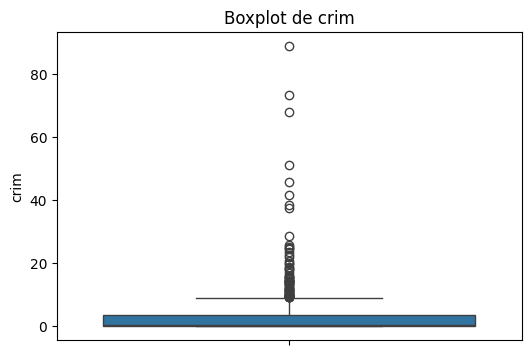

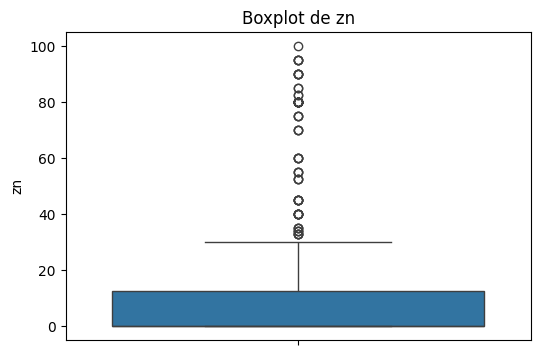

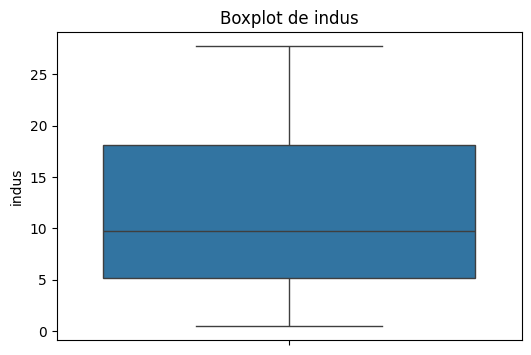

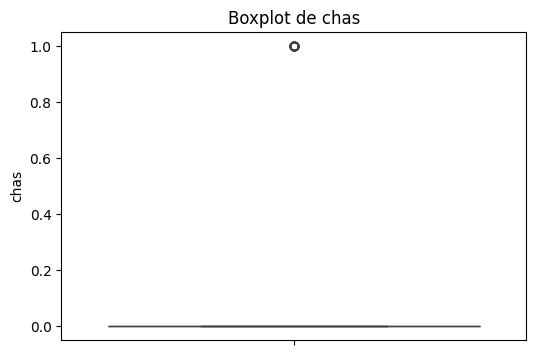

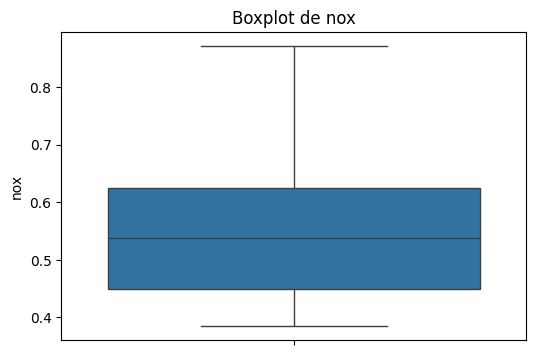

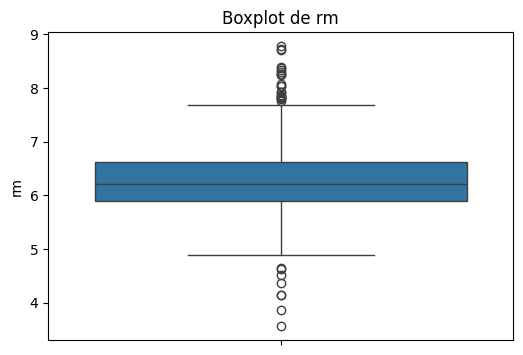

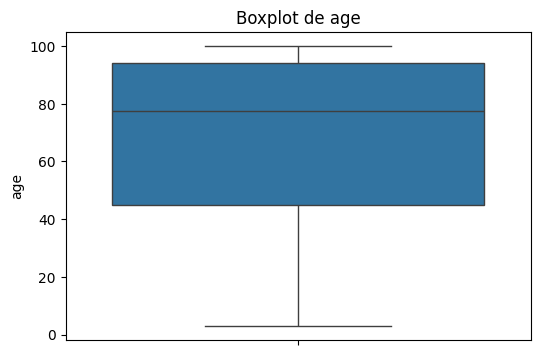

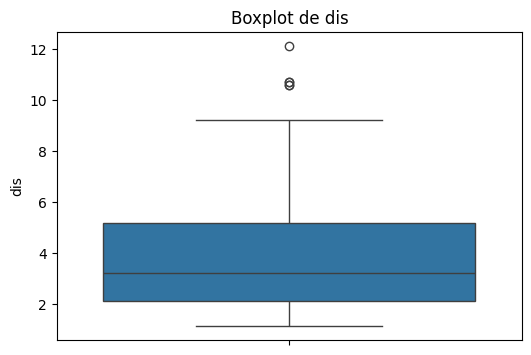

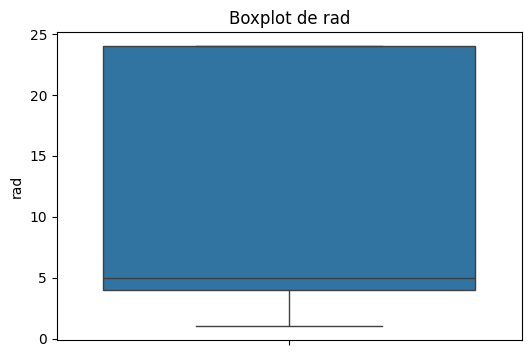

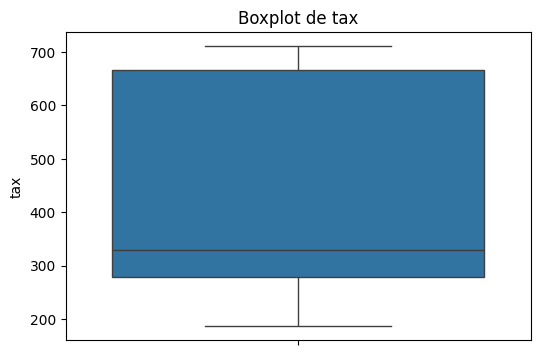

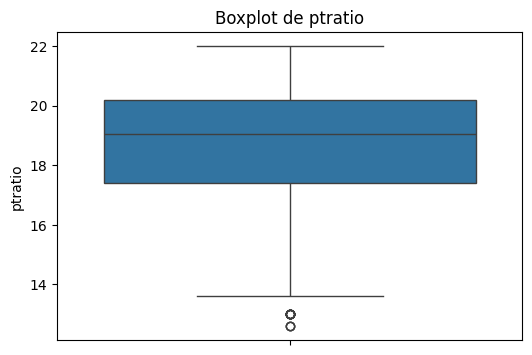

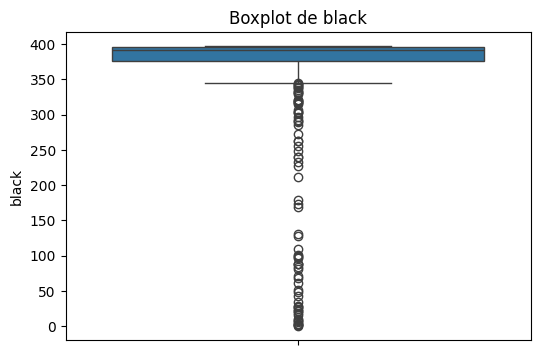

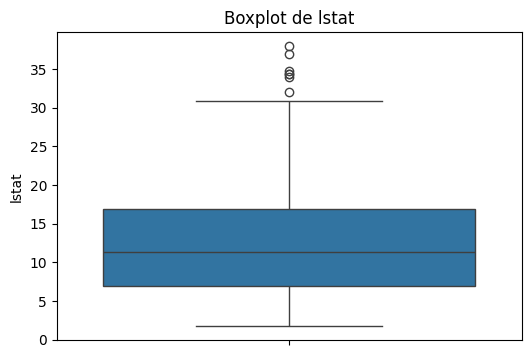

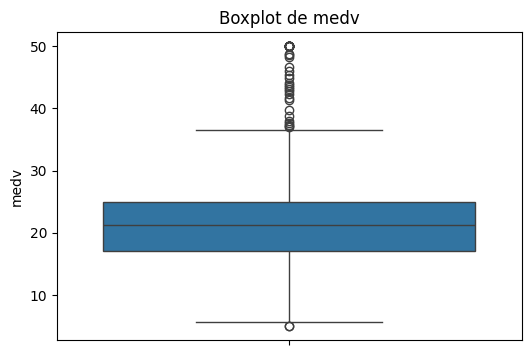

In [ ]:
# Crear boxplots individuales para cada columna
for column in df.columns:
    plt.figure(figsize=(6, 4))  # Tamaño del gráfico
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)
    plt.show()

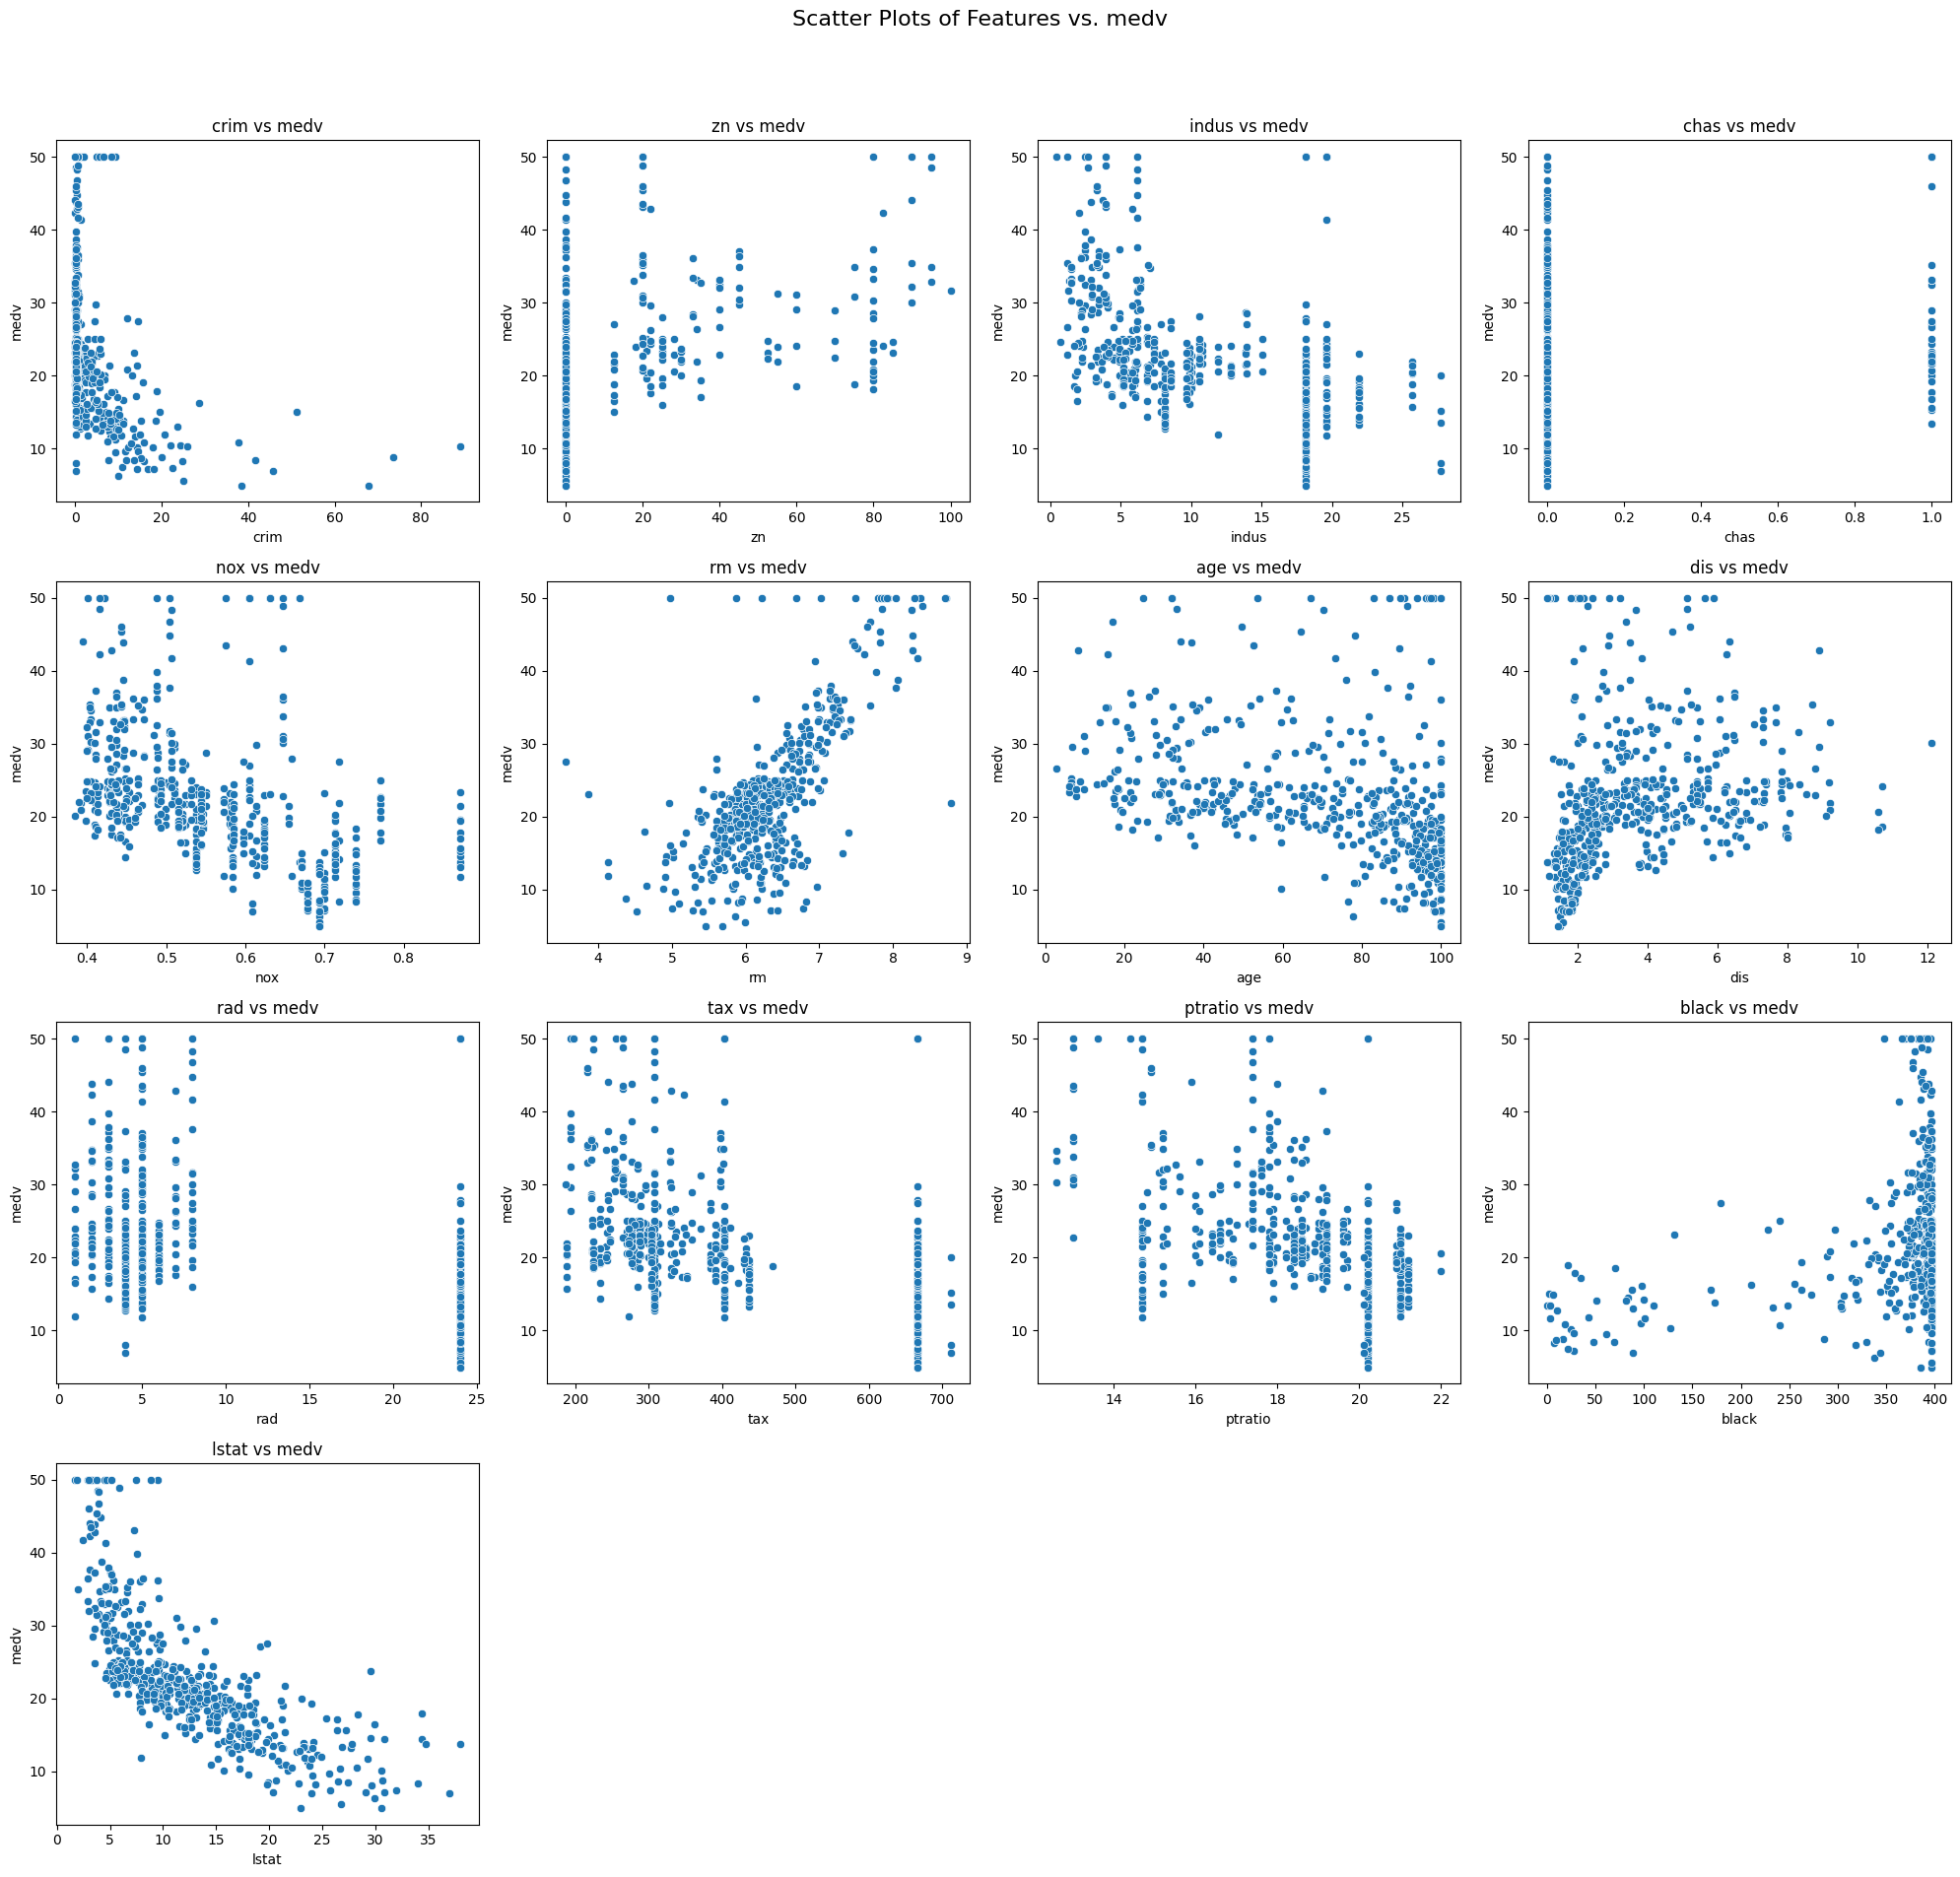

In [ ]:
# Crear una matriz de gráficos de dispersión
num_cols = len(df.columns)
num_rows = (num_cols -1 + 3) // 4 # Calcular el número de filas para una matriz de 4 columnas

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
fig.suptitle('Scatter Plots of Features vs. medv', fontsize=16)

col_idx = 0
for i in range(num_rows):
  for j in range(4):
    if col_idx < num_cols - 1 : # Excluir 'medv' de las variables predictoras
      sns.scatterplot(ax=axes[i, j], x=df.columns[col_idx], y='medv', data=df)
      axes[i,j].set_title(f'{df.columns[col_idx]} vs medv')
      col_idx += 1
    else:
      axes[i, j].axis('off') # Ocultar ejes para subplots vacíos

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar el diseño para evitar superposiciones
plt.show()

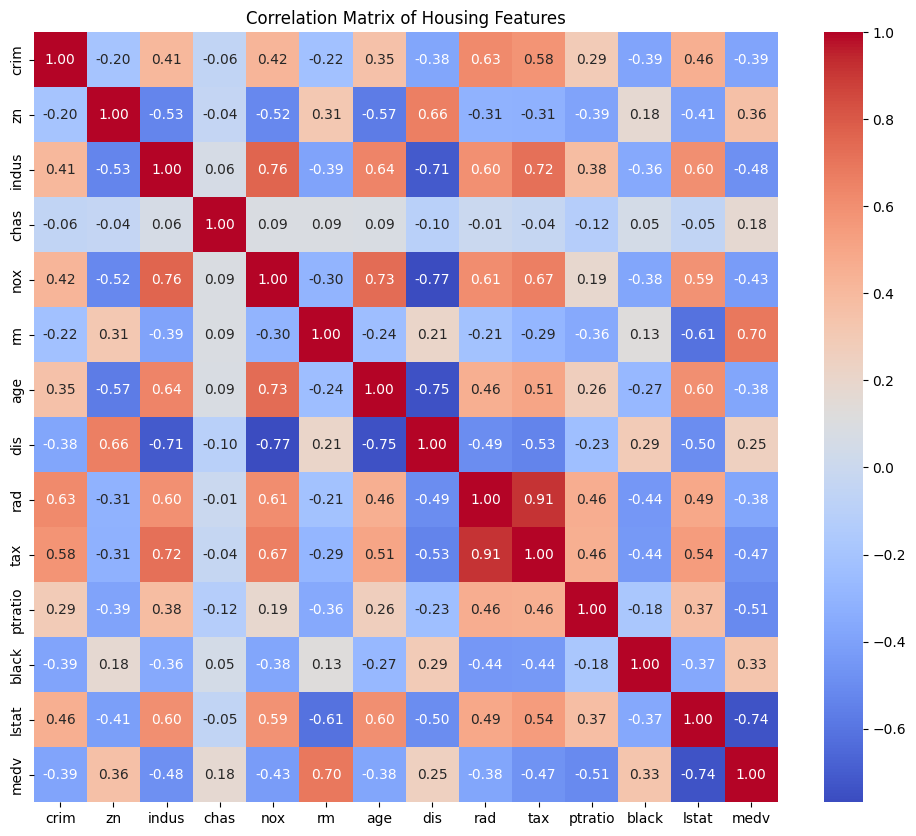

In [ ]:
# prompt: crear matriz de correlacion de variables de df

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Features')
plt.show()

In [21]:
# prompt: aplicar cross validation utilizando escaladores y modelos de machine learning evaluando el rmse para df

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = df.drop('medv', axis=1)
y = df['medv']

# Define scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Example: 5-fold cross-validation

results = {}
for scaler_name, scaler in scalers.items():
    results[scaler_name] = {}
    X_scaled = scaler.fit_transform(X)  # Scale the features
    for model_name, model in models.items():
        cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-cv_scores)
        results[scaler_name][model_name] = rmse_scores

# Display Results
for scaler_name, scaler_results in results.items():
    print(f"\nResults for {scaler_name}:")
    for model_name, rmse_scores in scaler_results.items():
        print(f"  {model_name}:")
        print(f"    RMSE Scores: {rmse_scores}")
        print(f"    Mean RMSE: {rmse_scores.mean():.4f}")
        print(f"    Std RMSE: {rmse_scores.std():.4f}")

# Visualize results (optional)
# Create a bar plot or table to compare RMSE across different models and scalers.


Results for StandardScaler:
  Linear Regression:
    RMSE Scores: [4.92860218 4.56813977 5.13770072 4.83748127 4.74202111]
    Mean RMSE: 4.8428
    Std RMSE: 0.1897
  Ridge Regression:
    RMSE Scores: [4.93097733 4.56894219 5.1401538  4.83598326 4.73740367]
    Mean RMSE: 4.8427
    Std RMSE: 0.1910
  Lasso Regression:
    RMSE Scores: [5.2490363  5.26196453 5.69539628 5.70899285 5.12907166]
    Mean RMSE: 5.4089
    Std RMSE: 0.2440
  Decision Tree:
    RMSE Scores: [4.73817413 4.29995395 5.5807129  4.24251233 4.15033101]
    Mean RMSE: 4.6023
    Std RMSE: 0.5293
  Random Forest:
    RMSE Scores: [2.94930098 3.26612323 4.14813675 3.07343096 2.81872443]
    Mean RMSE: 3.2511
    Std RMSE: 0.4721

Results for MinMaxScaler:
  Linear Regression:
    RMSE Scores: [4.92860218 4.56813977 5.13770072 4.83748127 4.74202111]
    Mean RMSE: 4.8428
    Std RMSE: 0.1897
  Ridge Regression:
    RMSE Scores: [4.85880675 4.67087322 5.15230487 4.90596948 4.73707683]
    Mean RMSE: 4.8650
    Std RM

In [22]:
pip install xgboost

In [23]:
from xgboost import XGBRegressor

In [29]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Entrenar el modelo de regresión XGBoost
model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train_scaled, y_train)

# 5. Realizar predicciones
y_pred = model.predict(X_test_scaled)

# 6. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nXGBoost with RobustScaler:")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


XGBoost with RobustScaler:
MSE: 6.54
R²: 0.91


In [12]:
# Prepare the data
X = df.drop('medv', axis=1)
y = df['medv']

In [13]:
# prompt: split data en train y test

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# prompt: aplicar robust scaler y random forest

# Apply RobustScaler and RandomForestRegressor
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(random_state=42)  # You can tune hyperparameters here
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2=r2_score(y_pred,y_test)
print(f"\nRandom Forest with RobustScaler:")
print(f"  RMSE on Test Set: {rmse:.4f}")
print(f"  R2 Score: {r2:.2f}")


Random Forest with RobustScaler:
  RMSE on Test Set: 2.7981
  R2 Score: 0.87
